In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./_data/train.csv', index_col=0)
test = pd.read_csv('./_data/test.csv', index_col=0)

# 데이터 확인

In [3]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
id,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,False,False,False,1,4,3,5,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,False,False,False,True,True,False,1,3,4,1,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,False,False,False,True,False,False,2,0,3,5,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,False,False,False,True,False,False,2,0,2,5,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,True,True,True,False,False,False,1,3,4,5,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [4]:
train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target'],
      dtype='object')

In [5]:
# from dataprep.eda import create_report
# report = create_report(df_train)
# report.save('dataprep_reoprt_2')

In [6]:
train.person_prefer_g.value_counts()

1    501951
Name: person_prefer_g, dtype: int64

In [7]:
train.person_prefer_f.value_counts()

1    501951
Name: person_prefer_f, dtype: int64

# 속성 일치 여부에 따른 target값 확인

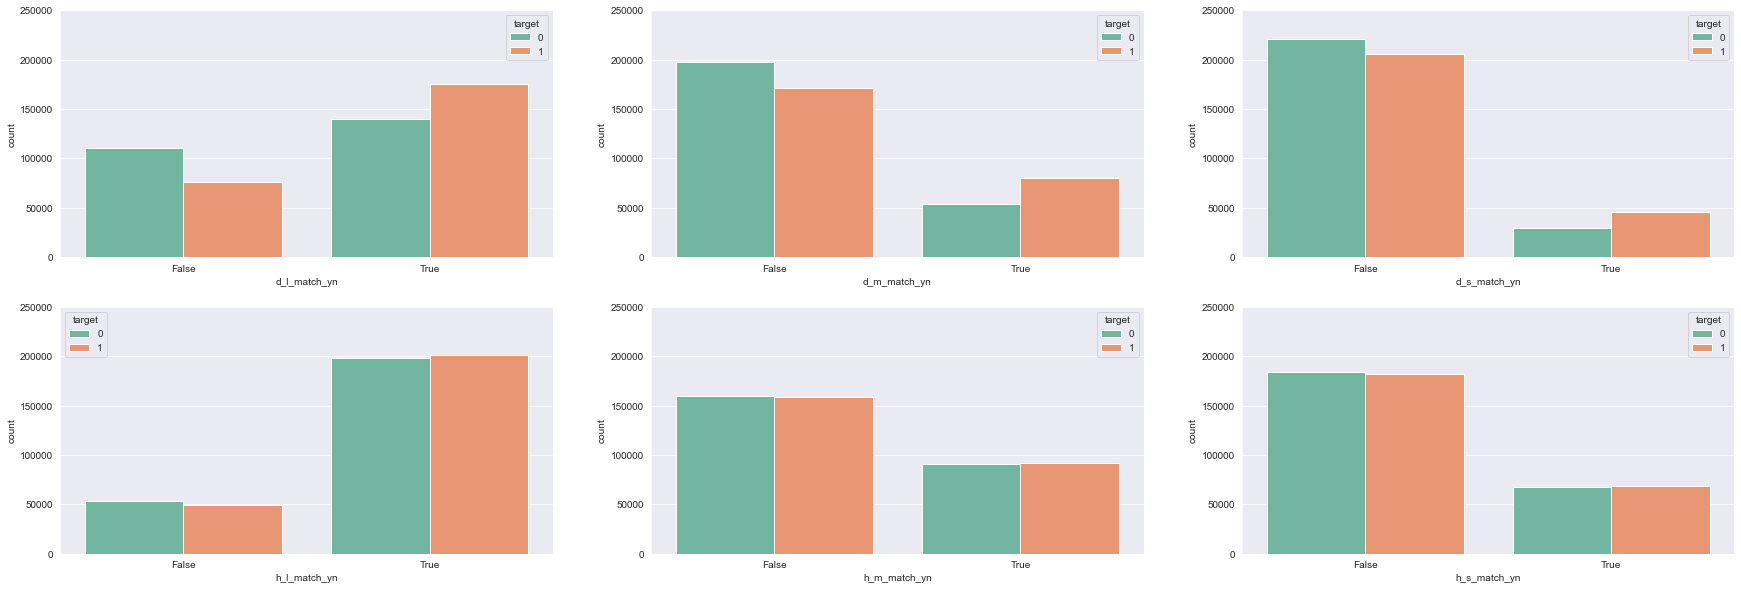

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
for i, col_name in enumerate(train.columns[:6]):
    sns.countplot(x=col_name, hue='target', data=train, ax=ax[i//3][i%3], palette='Set2')
    ax[i//3][i%3].set(ylim=[0,250000])
plt.show()

# 1. 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn'
* d_l_match_yn :  속성 D 대분류 매칭 여부
* d_m_match_yn :  속성 D  세분류 매칭 여부
* d_s_match_yn :  속성 D  코드 매칭 여부

In [9]:
pd.crosstab(train.d_l_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
d_l_match_yn,,,
False,110696,75987,186683
True,140410,174858,315268
All,251106,250845,501951


* d_l_match_yn=True(**속성 D 대분류가 일치할 경우**) target=1인 경우가 더 많다

In [10]:
pd.crosstab(train.d_m_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
d_m_match_yn,,,
False,197392,170932,368324
True,53714,79913,133627
All,251106,250845,501951


* 반면에 d_m_match_yn=False(**속성 D 세분류는 일치하지 않아도**) target=1인 경우가 훨씬 많다.

In [11]:
pd.crosstab(train.d_s_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
d_s_match_yn,,,
False,221306,205388,426694
True,29800,45457,75257
All,251106,250845,501951


* d_s_match_yn(속성 D  코드 매칭 여부)도 역시 False일 때 target=1인 값이 많다. 

# 2. 'h_l_match_yn','h_m_match_yn', 'h_s_match_yn',
* h_l_match_yn :  속성 H 대분류 매칭 여부
* h_m_match_yn :  속성 H 중분류 매칭 여부
* h_s_match_yn :  속성 H 코드 매칭 여부 

In [12]:
pd.crosstab(train.h_l_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
h_l_match_yn,,,
False,53255,49358,102613
True,197851,201487,399338
All,251106,250845,501951


In [13]:
pd.crosstab(train.h_m_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
h_m_match_yn,,,
False,160007,158811,318818
True,91099,92034,183133
All,251106,250845,501951


In [14]:
pd.crosstab(train.h_s_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
h_s_match_yn,,,
False,183461,181861,365322
True,67645,68984,136629
All,251106,250845,501951


# 데이터-속성 매칭
### HappyNewYear님의 공유 코드 사용
* https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

In [15]:
from typing import Dict
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [16]:
d_code = pd.read_csv('./_data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('./_data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('./_data/속성_L_코드.csv', index_col=0).T.to_dict()

df_train = pd.read_csv('./_data/train.csv',index_col=0)
df_test = pd.read_csv('./_data/test.csv',index_col=0)

df_train = add_code(df_train, d_code, h_code, l_code)
df_test = add_code(df_test, d_code, h_code, l_code)

In [17]:
df_train = df_train.drop(columns=['person_prefer_g','person_prefer_f'])

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501951 entries, 0 to 501950
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   d_l_match_yn            501951 non-null  bool  
 1   d_m_match_yn            501951 non-null  bool  
 2   d_s_match_yn            501951 non-null  bool  
 3   h_l_match_yn            501951 non-null  bool  
 4   h_m_match_yn            501951 non-null  bool  
 5   h_s_match_yn            501951 non-null  bool  
 6   person_attribute_a      501951 non-null  int64 
 7   person_attribute_a_1    501951 non-null  int64 
 8   person_attribute_b      501951 non-null  int64 
 9   person_prefer_c         501951 non-null  int64 
 10  person_prefer_d_1       501951 non-null  int64 
 11  person_prefer_d_2       501951 non-null  int64 
 12  person_prefer_d_3       501951 non-null  int64 
 13  person_prefer_e         501951 non-null  int64 
 14  person_prefer_h_1       501951 non-n

## 선호속성 2, 3에 대해서도 일치 여부 판단하는 열 추가

In [19]:
df_train['d_n_match_yn'] = 0

df_train['d_n_match_yn_2'] = 0
df_train['d_l_match_yn_2'] = 0
df_train['d_m_match_yn_2'] = 0
df_train['d_s_match_yn_2'] = 0

df_train['d_n_match_yn_3'] = 0
df_train['d_l_match_yn_3'] = 0
df_train['d_m_match_yn_3'] = 0
df_train['d_s_match_yn_3'] = 0

df_train['h_l_match_yn_2'] = 0
df_train['h_m_match_yn_2'] = 0
df_train['h_s_match_yn_2'] = 0

df_train['h_l_match_yn_3'] = 0
df_train['h_m_match_yn_3'] = 0
df_train['h_s_match_yn_3'] = 0

In [20]:
df_train['d_n_match_yn']= df_train['person_prefer_d_1_n']==df_train['contents_attribute_d_n']

df_train['d_n_match_yn_2']= df_train['person_prefer_d_2_n']==df_train['contents_attribute_d_n']
df_train['d_l_match_yn_2']= df_train['person_prefer_d_2_l']==df_train['contents_attribute_d_l']
df_train['d_m_match_yn_2']= df_train['person_prefer_d_2_m']==df_train['contents_attribute_d_m']
df_train['d_s_match_yn_2']= df_train['person_prefer_d_2_s']==df_train['contents_attribute_d_s']

df_train['d_n_match_yn_3']= df_train['person_prefer_d_3_n']==df_train['contents_attribute_d_n']
df_train['d_l_match_yn_3']= df_train['person_prefer_d_3_l']==df_train['contents_attribute_d_l']
df_train['d_m_match_yn_3']= df_train['person_prefer_d_3_m']==df_train['contents_attribute_d_m']
df_train['d_s_match_yn_3']= df_train['person_prefer_d_3_s']==df_train['contents_attribute_d_s']

df_train['h_l_match_yn_2']= df_train['person_prefer_h_2_l']==df_train['contents_attribute_h_l']
df_train['h_m_match_yn_2']= df_train['person_prefer_h_2_m']==df_train['contents_attribute_h_m']
df_train['h_s_match_yn_2']= df_train['person_prefer_h_2']==df_train['contents_attribute_h']

df_train['h_l_match_yn_3']= df_train['person_prefer_h_3_l']==df_train['contents_attribute_h_l']
df_train['h_m_match_yn_3']= df_train['person_prefer_h_3_m']==df_train['contents_attribute_h_m']
df_train['h_s_match_yn_3']= df_train['person_prefer_h_3']==df_train['contents_attribute_h']

In [21]:
df_train[df_train.columns[-15:]]

,d_n_match_yn,d_n_match_yn_2,d_l_match_yn_2,d_m_match_yn_2,d_s_match_yn_2,d_n_match_yn_3,d_l_match_yn_3,d_m_match_yn_3,d_s_match_yn_3,h_l_match_yn_2,h_m_match_yn_2,h_s_match_yn_2,h_l_match_yn_3,h_m_match_yn_3,h_s_match_yn_3
id,,,,,,,,,,,,,,,
0,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
501947,True,False,True,True,True,False,True,True,True,True,True,True,True,False,False
501948,True,False,True,False,False,True,True,True,True,False,False,False,False,False,False


# 대분류 속성 코드 일치수

In [22]:
d_l_match_cols = ['d_l_match_yn', 'd_l_match_yn_2', 'd_l_match_yn_3']

In [23]:
df_train['d_l_match_sum'] = 0
df_train['d_l_match_sum'] = df_train[d_l_match_cols].T.sum().T
df_train['d_l_match_sum'] = df_train['d_l_match_sum']/len(d_l_match_cols)

In [24]:
df_train['d_l_match_sum'].describe()

count    501951.000000
mean          0.586488
std           0.417893
min           0.000000
25%           0.000000
50%           0.666667
75%           1.000000
max           1.000000
Name: d_l_match_sum, dtype: float64

In [25]:
pd.crosstab(df_train.d_l_match_sum, train.target, margins=True).style.background_gradient()

target,0,1,All
d_l_match_sum,,,
0.0,84968,49479,134447
0.3333333333333333,31405,34604,66009
0.6666666666666666,39633,47696,87329
1.0,95100,119066,214166
All,251106,250845,501951


In [26]:
h_match_cols = ['h_l_match_yn', 'h_l_match_yn_2', 'h_l_match_yn_3','h_s_match_yn', 'h_s_match_yn_2', 'h_s_match_yn_3', 'h_m_match_yn', 'h_m_match_yn_2', 'h_m_match_yn_3']

In [28]:
df_train['h_match_sum'] = 0
df_train['h_match_sum'] = df_train[h_match_cols].T.sum().T
df_train['h_match_sum'] = df_train['h_match_sum']/len(h_match_cols)

In [29]:
df_train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m

# 1. 회원 속성 a&a_1과 선호속성의 관계

In [30]:
df_train.loc[df_train['person_attribute_a']==2,'person_attribute_a'] = 11

In [31]:
df_train['person_attribute_a_cross_a1'] = df_train['person_attribute_a'] * df_train['person_attribute_a_1'].apply(lambda x: x+1)
df_train['person_attribute_a_cross_a1'].value_counts()

11    148678
6      55225
2      53643
7      48340
3      47429
4      43412
5      42042
8      31221
1       9948
22      7552
33      4466
44      2928
66      2558
55      2283
77      1480
88       746
Name: person_attribute_a_cross_a1, dtype: int64

In [32]:
df_train['person_attribute_a_cross_a1'] = df_train['person_attribute_a_cross_a1'].apply(lambda x: str(x))

## 1-1. 선호 속성 C

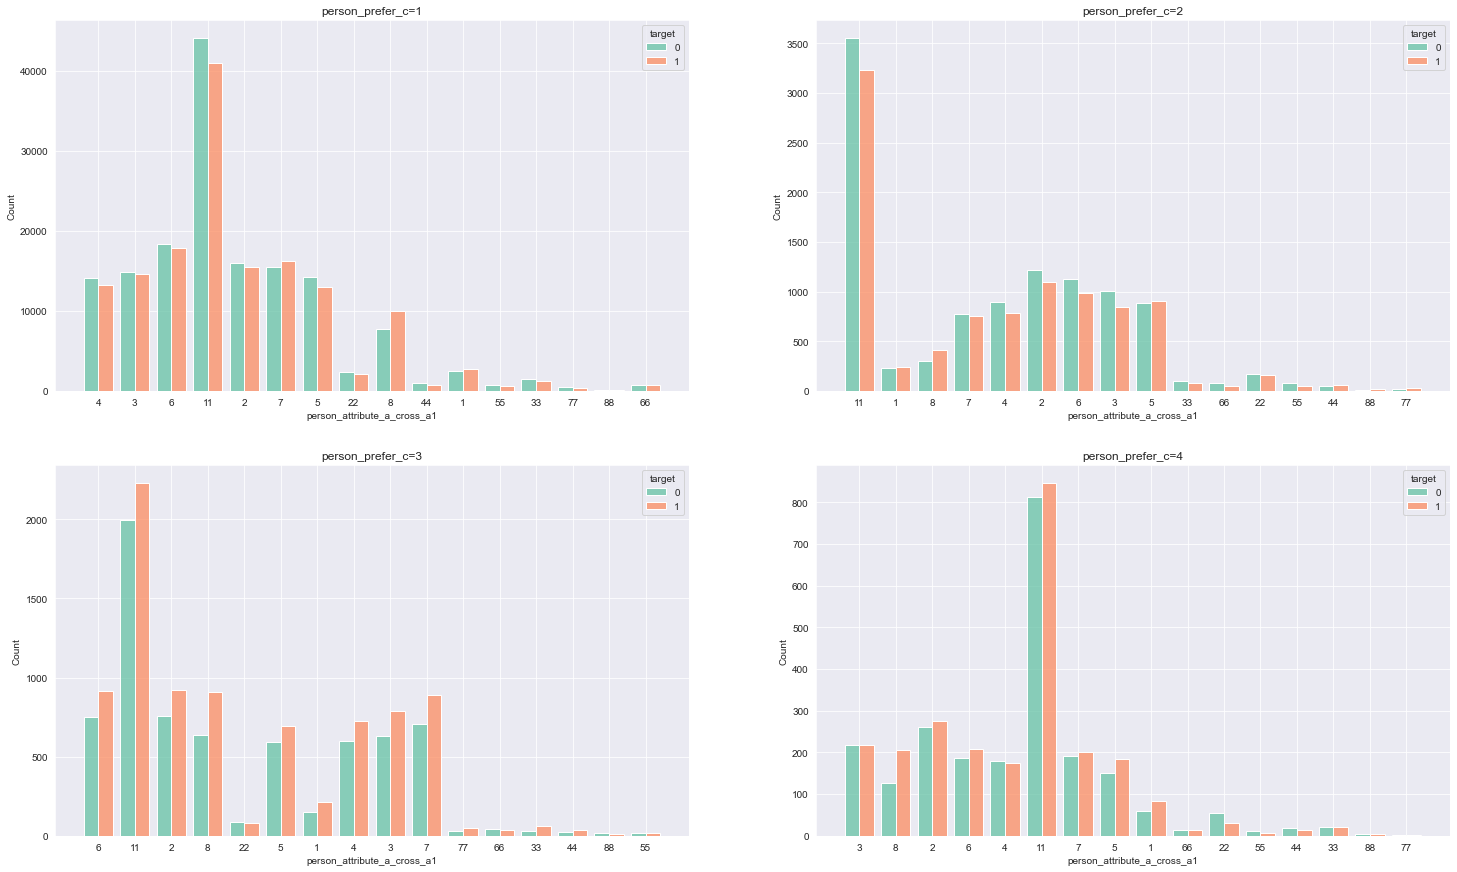

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))

for i in range(4):
    sns.histplot(x ='person_attribute_a_cross_a1', hue='target', data = df_train[train['person_prefer_c']==i+1], ax=ax[i//2][i%2], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i//2][i%2].set(xticks=[x for x in df_train['person_attribute_a_cross_a1'].unique()], title=f'person_prefer_c={i+1}')
plt.show()

In [34]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.person_prefer_c, margins=True).style.background_gradient()

person_prefer_c,1,2,3,4,5,All
person_attribute_a_cross_a1,,,,,,
1,5282,477,364,143,3682,9948
11,85053,6789,4225,1661,50950,148678
2,31381,2318,1682,538,17724,53643
22,4463,332,173,84,2500,7552
3,29408,1849,1423,435,14314,47429
33,2767,177,95,44,1383,4466
4,27357,1686,1321,355,12693,43412
44,1723,112,59,32,1002,2928
5,27221,1789,1288,335,11409,42042


## 1-2. 선호속성e

In [35]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.person_prefer_e, margins=True).style.background_gradient()

person_prefer_e,0,1,2,3,4,5,6,7,8,9,10,11,All
person_attribute_a_cross_a1,,,,,,,,,,,,,
1,1648,25,90,3734,3122,963,235,40,42,7,10,32,9948
11,24208,159,963,54814,48514,16175,2893,345,256,29,87,235,148678
2,6967,34,286,17931,18943,7437,1498,246,145,38,37,81,53643
22,846,7,37,3097,2597,828,108,7,6,0,1,18,7552
3,5443,36,219,13450,16415,8653,2451,374,190,62,37,99,47429
33,442,0,23,1596,1650,625,113,9,4,0,0,4,4466
4,4779,23,193,11182,14114,8682,3217,671,322,82,60,87,43412
44,255,3,18,1055,1087,414,81,8,3,0,0,4,2928
5,4694,27,129,9557,13545,8684,3757,952,428,84,102,83,42042


# 2. 회원 속성 b과 선호속성의 관계
## 2-1. 선호속성 c

In [36]:
pd.crosstab(df_train.person_attribute_b, df_train.person_prefer_c, margins=True).style.background_gradient('icefire_r')

person_prefer_c,1,2,3,4,5,All
person_attribute_b,,,,,,
0,58,9,7,3,28,105
1,5377,573,640,193,3367,10150
2,135775,10248,7670,2314,67877,223884
3,88914,5599,3696,1220,40060,139489
4,71127,3546,3328,971,42228,121200
5,3320,248,324,103,3128,7123
All,304571,20223,15665,4804,156688,501951


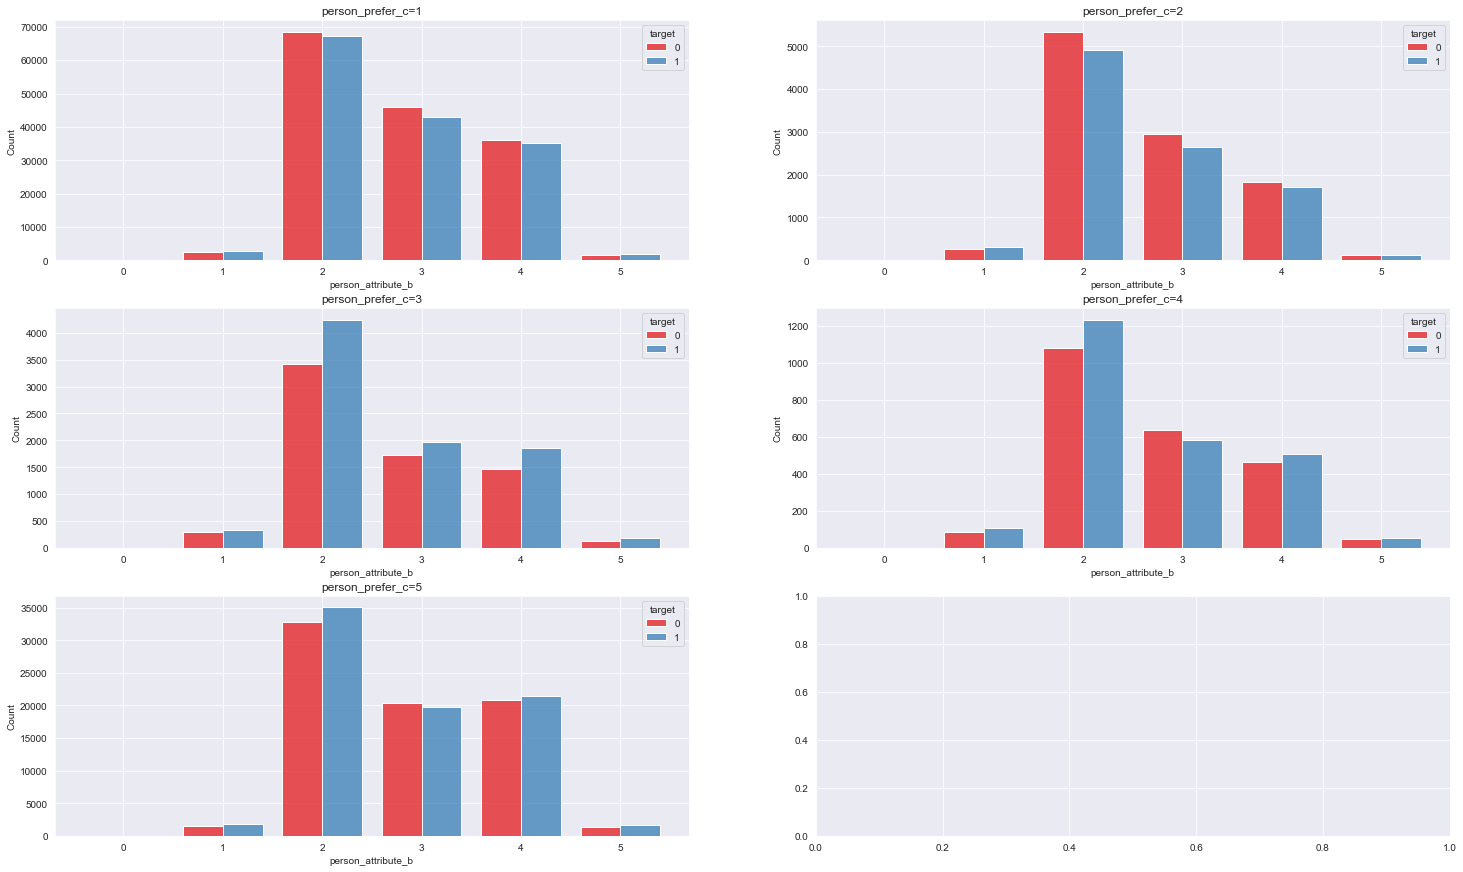

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))

for i in range(5):
    sns.histplot(x ='person_attribute_b', hue='target', data = df_train[train['person_prefer_c']==i+1], ax=ax[i//2][i%2], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set1')
    ax[i//2][i%2].set(xticks=[x for x in df_train['person_attribute_b'].unique()], title=f'person_prefer_c={i+1}')
plt.show()

## 2-2. 선호속성 e

In [38]:
pd.crosstab(df_train.person_attribute_b, df_train.person_prefer_e, margins=True).style.background_gradient('icefire_r')

person_prefer_e,0,1,2,3,4,5,6,7,8,9,10,11,All
person_attribute_b,,,,,,,,,,,,,
0,10,0,0,36,29,10,13,7,0,0,0,0,105
1,976,38,128,3412,2994,1515,636,213,130,32,25,51,10150
2,27392,146,1162,69275,70918,35609,12600,3462,1925,439,460,496,223884
3,19013,106,619,39286,44983,22336,8063,2358,1556,431,448,290,139489
4,18158,70,397,26705,39204,20815,9207,2388,2339,516,886,515,121200
5,1127,6,17,969,1972,1350,888,213,309,55,117,100,7123
All,66676,366,2323,139683,160100,81635,31407,8641,6259,1473,1936,1452,501951


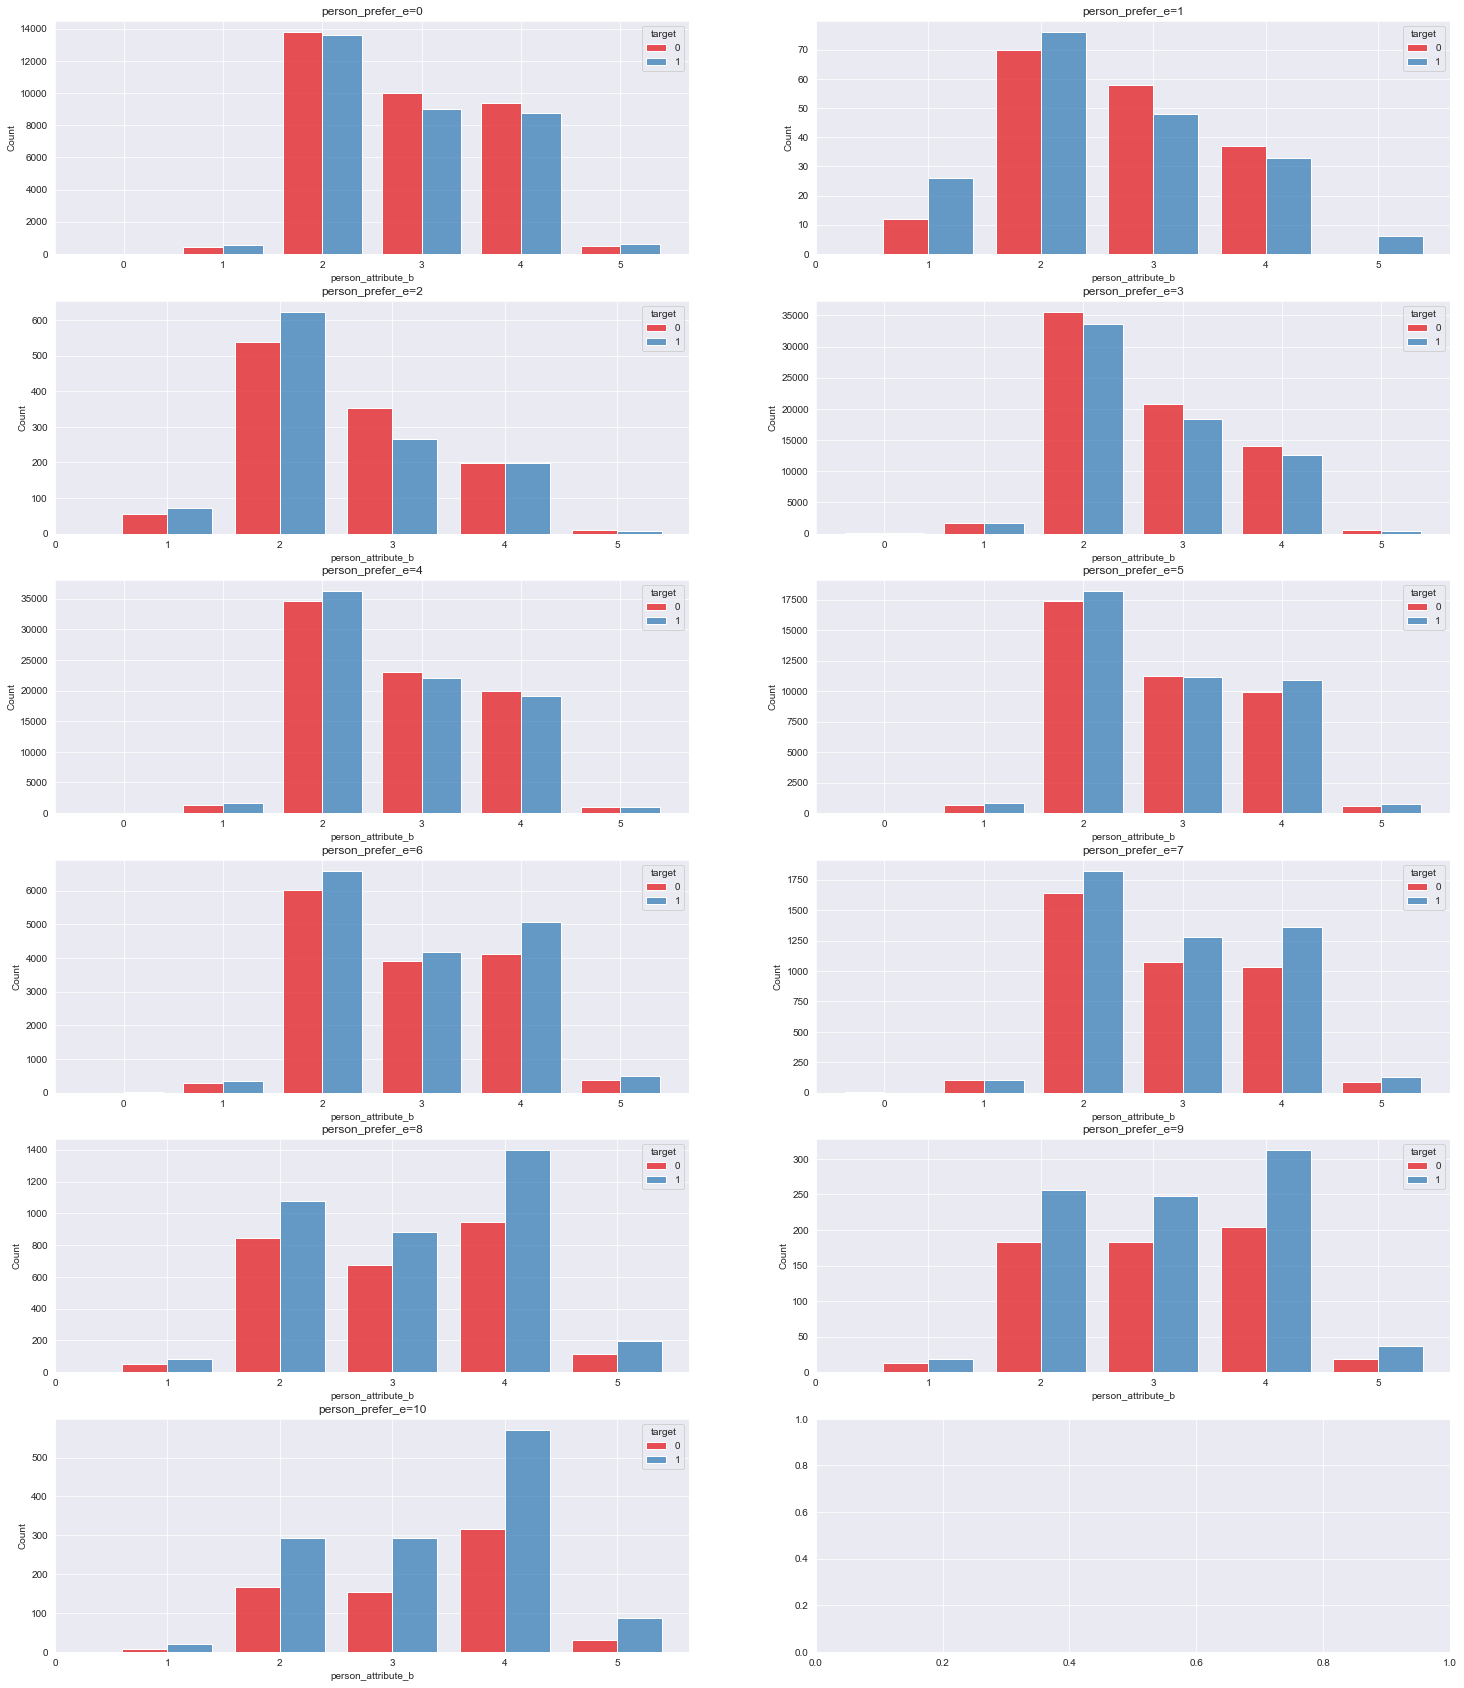

In [39]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(25, 30))

for i in range(11):
    sns.histplot(x ='person_attribute_b', hue='target', data = df_train[train['person_prefer_e']==i], ax=ax[i//2][i%2], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set1')
    ax[i//2][i%2].set(xticks=[x for x in df_train['person_attribute_b'].unique()], title=f'person_prefer_e={i}')
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_train['person_attribute_a_cross_a1'].values)
y

array([ 8,  6,  1, ..., 14,  2, 12], dtype=int64)

In [44]:
df_train['person_attribute_a_cross_a1'] = pd.DataFrame(y)

# 3. 회원 속성 a&a_1과 컨텐츠 속성
## 3-1. 컨텐츠 속성 a

In [46]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_a, margins=True).style.background_gradient('Set3')

contents_attribute_a,1,2,3,All
person_attribute_a_cross_a1,,,,
0,2228,1090,6630,9948
1,24703,20006,103969,148678
2,14583,5393,33667,53643
3,1481,904,5167,7552
4,14475,4411,28543,47429
5,951,499,3016,4466
6,14216,3917,25279,43412
7,572,326,2030,2928
8,14314,3588,24140,42042


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

for i in range(3):
    sns.histplot(x ='person_attribute_a_cross_a1', hue='target', data = df_train[train['contents_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set3')
    ax[i].set(xticks=df_train.person_attribute_a_cross_a1.unique(),title=f'contents_attribute_a={i+1}')
plt.show()

## 3-2. 컨텐츠 속성 c

In [ ]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_c, margins=True).style.background_gradient('Set3')

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))

for i in range(4):
    sns.histplot(x ='person_attribute_a_cross_a1', hue='target', data = df_train[train['contents_attribute_c']==i+1], ax=ax[i//2][i%2], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set3')
    ax[i//2][i%2].set(xticks=df_train.person_attribute_a_cross_a1.unique(), title=f'contents_attribute_c={i+1}')
plt.show()

## 3-3. 컨텐츠 속성 e

In [ ]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_e, margins=True).style.background_gradient()

## 3-4. 컨텐츠속성 i

In [ ]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_i, margins=True).style.background_gradient()

## 3-5. 컨텐츠 속성 j,j_1
* j=1,j=2는 j_1=1~5, 6 ~10으로 완벽히 나누어지므로 제외

In [ ]:
pd.crosstab(df_train.contents_attribute_j_1, df_train.contents_attribute_j, margins=True).style.background_gradient()

In [ ]:
df_train.drop(columns=['contents_attribute_j'],inplace=True)

In [ ]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_j_1, margins=True).style.background_gradient()

## 3-6. 컨텐츠 속성 K

In [ ]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_k, margins=True).style.background_gradient()

## 3-8. 컨텐츠 속성 M

In [ ]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_m, margins=True).style.background_gradient()

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_train[['person_attribute_a_cross_a1','person_attribute_b','contents_attribute_a',
                           'contents_attribute_c','contents_attribute_e','contents_attribute_i','contents_attribute_j_1',
                           'contents_attribute_k','contents_attribute_l','contents_attribute_m','person_prefer_c',
                           'person_prefer_e','target']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

# 선호속성 C와 컨텐츠 속성 C

In [ ]:
pd.crosstab(df_train.person_prefer_c, df_train.contents_attribute_c, margins=True).style.background_gradient()

* 선호속성C는 1 ~ 5까지 있는 반면 컨텐츠 속성 C는 5가 없음.

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i in range(4):
    sns.histplot(x ='person_prefer_c', hue='target', data = df_train[train['contents_attribute_c']==i+1], ax=ax[i//2][i%2], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i//2][i%2].set(xticks=df_train.person_prefer_c.unique(), ylim = [0, 130000], title=f'contents_attribute_c={i+1}')
plt.show()

In [ ]:
df_train['contents_attribute_l'].value_counts()>1000

In [ ]:
code_l = pd.read_csv('./_data/속성_L_코드.csv')
code_l

In [ ]:
pd.crosstab(df_train.person_attribute_a_cross_a1, df_train.contents_attribute_l, margins=True).style.background_gradient('Set3')

In [ ]:
pd.crosstab(df_train.target, df_train.contents_attribute_l, margins=True).style.background_gradient('Set3')

In [ ]:
pd.crosstab(df_train.target, df_train.contents_attribute_l_n, margins=True).style.background_gradient('Set3')

In [ ]:
pd.crosstab(df_train.target, df_train.contents_attribute_l_s, margins=True).style.background_gradient('Set3')

In [ ]:
pd.crosstab(df_train.target, df_train.contents_attribute_l_m, margins=True).style.background_gradient('Set3')

In [ ]:
pd.crosstab(df_train.target, df_train.contents_attribute_l_l, margins=True).style.background_gradient('Set3')